<a href="https://colab.research.google.com/github/babu293/optimization-techniques-/blob/main/ant_colony_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best tour: [1]


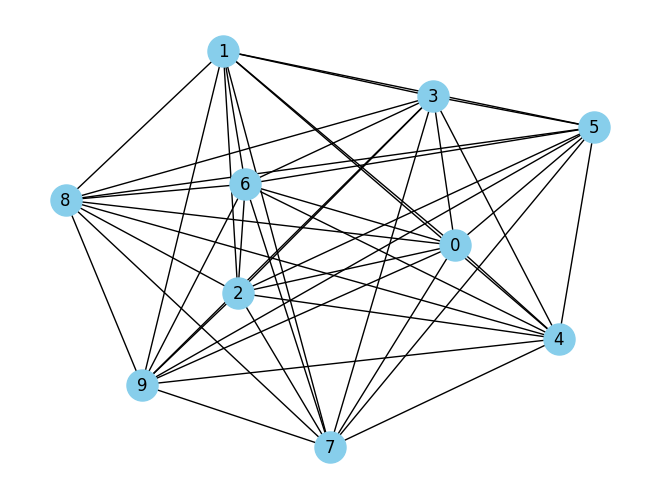

In [ ]:
import random
import networkx as nx

class AntColonyOptimization:
    def __init__(self, num_ants, num_iterations, alpha, beta, evaporation_rate):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha  # Pheromone importance
        self.beta = beta    # Distance importance
        self.evaporation_rate = evaporation_rate
        self.graph = None

    def create_graph(self, num_cities):
        # Create a complete graph with random edge weights
        self.graph = nx.complete_graph(num_cities)
        for (u, v) in self.graph.edges():
            self.graph[u][v]['weight'] = random.randint(1, 100)

    def initialize_pheromone(self, initial_pheromone):
        # Initialize pheromone on all edges with the given value
        for (u, v) in self.graph.edges():
            self.graph[u][v]['pheromone'] = initial_pheromone

    def ant_tour(self, ant):
        # Each ant constructs a tour
        tour = [random.choice(list(self.graph.nodes()))]
        unvisited_cities = set(self.graph.nodes()) - set(tour)

        while unvisited_cities:
            next_city = self.select_next_city(ant, tour[-1], unvisited_cities)
            tour.append(next_city)
            unvisited_cities.remove(next_city)

        return tour

    def select_next_city(self, ant, current_city, unvisited_cities):
        # Roulette wheel selection based on pheromone and distance
        pheromone_sum = sum((self.graph[current_city][v]['pheromone'] ** self.alpha) *
                            (1.0 / self.graph[current_city][v]['weight']) ** self.beta
                            for v in unvisited_cities)

        probabilities = [(self.graph[current_city][v]['pheromone'] ** self.alpha) *
                         (1.0 / self.graph[current_city][v]['weight']) ** self.beta / pheromone_sum
                         for v in unvisited_cities]

        return random.choices(list(unvisited_cities), probabilities)[0]

    def update_pheromone(self, ant_tours):
        # Evaporate pheromone on all edges and deposit new pheromone based on ant tours
        for (u, v) in self.graph.edges():
            self.graph[u][v]['pheromone'] *= (1 - self.evaporation_rate)

        for tour in ant_tours:
            tour_length = sum(self.graph[tour[i]][tour[i + 1]]['weight'] for i in range(len(tour) - 1))
            tour_length += self.graph[tour[-1]][tour[0]]['weight']  # Return to starting city

            for i in range(len(tour) - 1):
                self.graph[tour[i]][tour[i + 1]]['pheromone'] += 1.0 / tour_length

            self.graph[tour[-1]][tour[0]]['pheromone'] += 1.0 / tour_length

    def run(self):
        if self.graph is None:
            raise ValueError("Graph has not been created. Call 'create_graph' first.")

        for iteration in range(self.num_iterations):
            ant_tours = [self.ant_tour(ant) for ant in range(self.num_ants)]
            self.update_pheromone(ant_tours)

        return self.graph

def main():
    num_cities = 10
    num_ants = 5
    num_iterations = 100
    alpha = 1.0
    beta = 2.0
    evaporation_rate = 0.5
    initial_pheromone = 0.1

    aco = AntColonyOptimization(num_ants, num_iterations, alpha, beta, evaporation_rate)
    aco.create_graph(num_cities)
    aco.initialize_pheromone(initial_pheromone)
    graph = aco.run()

    nx.draw(graph, with_labels=True, node_size=500, node_color='skyblue')
    print("Best tour:", nx.shortest_path(graph,1,1, weight='weight'))

if __name__ == "__main__":
    main()
